<h1 align=center>Support Vector Machine (SVM) In Depth </h1>

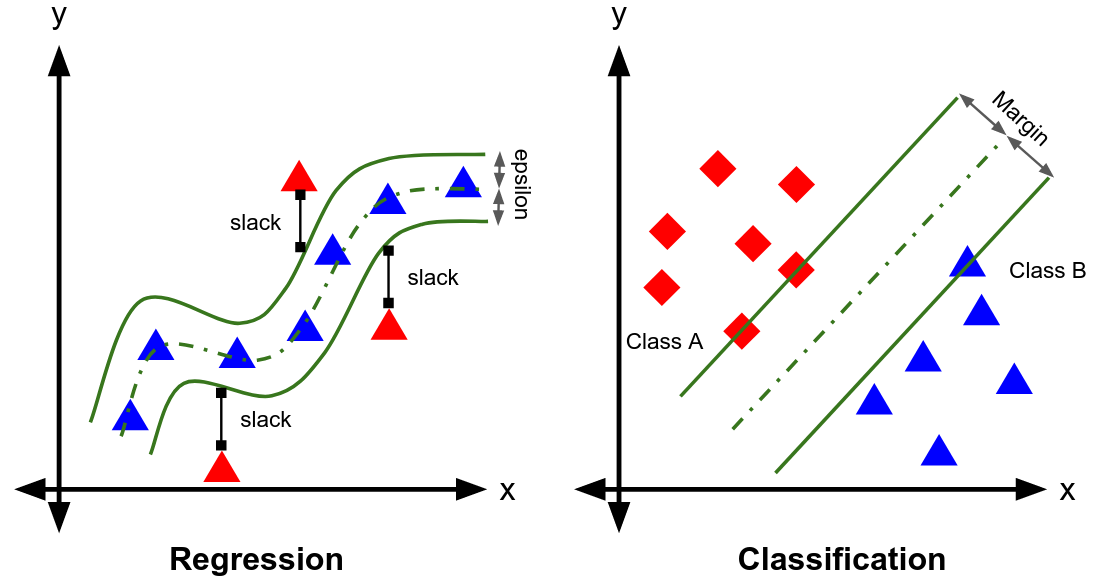

- Supervised ML Algorithm
- Used in regression and classification problems
- Require feature scaling
- Does not perform well on an imbalance dataset
- Not sensitive to outliers
- Powerful for medium-sized datasets of features with similar meaning, sensitive to parameter
- In SVM, the algorithm aim is to find an optimal hyperplane that best separates the different classes in the data

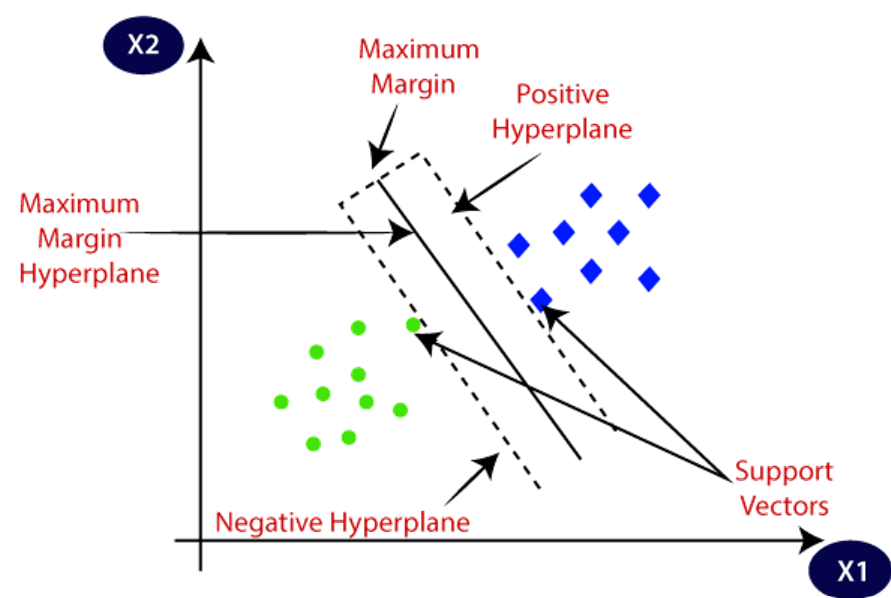

### Important Points:

1. **Hyperplane:** It separates the different classes
2. **Margin:** distance between hyperplane and support vectors
3. **Support Vectors:** closest points to the hyperplane
4. **Soft Margin:** If there is some error within a margin
5. **Hard Margin:** If there is no error within the margin

### Math Behind SVM

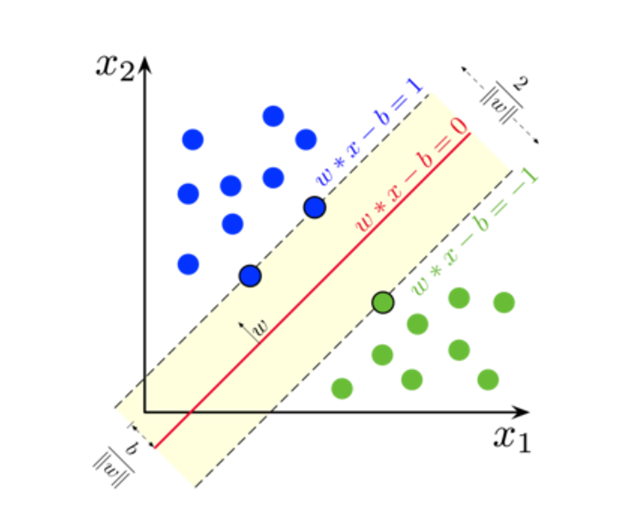

#### Hard Margin:

$$
w^T x - b = 1 \hspace{3cm}{ (1)}\\
w^T x - b = 0 \hspace{3cm}{(2)}\\
w^T x - b = -1 \hspace{3cm}{(3)}\\
$$


- w→ weight
- x→ independent features
- b→ bias
- (1): Anything on or above this boundary is of one class, with label 1
- (2): Hyperplane
- (3): Anything on or below this boundary is of the other class, with label −1



`Note`:  the distance between those two hyperplanes [(1), (3)] is  `2 / ||w||`,  so to maximize the distance between the planes we want to minimize `||w||`.

**These constraints state that each data point must lie on the correct side of the margin**

$$
w^T x_i - b \ge 1, \;\; if\;y_i=1 \\
or\\
w^T x_i - b \le -1, \;\; if\;y_i=-1\\ This\;can \;be \;rewritten\; as:\\y_i(w^T x_i - b) \ge 1 \hspace{1cm} for all 1\le i\le n\\ 
$$

We can put this together to get the optimization problem:

$$
minimiz\underset{w,b}\;\;\; ||w|| \\ subject \;to: \hspace {1cm} y_i(w^T x_i - b) \ge 1 \;\;\;\; \forall i\in \{1,...,n\}\\
$$

#### Soft Margin:

- The below equation is the hinge loss function which is helpful when data are non linearly separable

$$
max(0,1 - y_i(w^Tx_i-b) )
$$

- So the goal of the optimization, then is to minimize:

$$
||w||^2+C[\frac1{n} \sum \limits _{i=1} ^{n}max(0,1 - y_i(w^Tx_i-b) )]
$$

- By deconstructing the hinge loss, this optimization problem can be massaged into the following:

$$
minimize\underset {w,b,\zeta}\;\;\;||w||^2_2+C \sum \limits _{i=1} ^{n}\zeta_i \\ subject \;to: \hspace {1cm} y_i(w^T x_i - b) \ge 1-\zeta, \;\;\zeta\ge0 \;\;\;\; \forall i\in \{1,...,n\}\\
$$

- The goal of optimization is to find the values for (w,b,zeta) to minimize the above equation
- C→ controls the tread-off between maximizing the margin and minimizing the classification error. A smaller C value allows a wider margin but the may results in more misclassification
- zeta ($\zeta$) → distance of that particular point from its correct hyperplane

   

### SVM Kernel

- For non linear separable we use SVM KERNEL which change from low dimension to high dimension

### Types of Kernel:

1. Polynomial kernel
2. Gaussian RBF kernel
3. Sigmoid kernel

In [3]:
# classification problem
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
y = np.array([1, 1, 2, 2])

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X, y)
clf.score(X, y)

1.0

In [4]:
# regression problem
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X, y)
regr.score(X,y)

0.5760863805344085